# Demo of collaborative target tracking with ICI included 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


P1 [[ 2.5 -1. ]
 [-1.   1.2]]
P2 [[ 0.8 -0.5]
 [-0.5  4. ]]
microseconds taken for the Kalman fusion=  0
P of Kal [[ 0.60071928 -0.26479074]
 [-0.26479074  0.77461171]]
c of Kal [[1.6579457 ]
 [0.65735288]]
microseconds taken for the CI fusion=  0
P of CI [[ 1.3320359  -0.57206299]
 [-0.57206299  1.41827261]]
c of CI [[1.54220417]
 [0.67359692]]
microseconds taken for the CCE fusion=  998
P of CCE [[ 0.80076541 -0.34216278]
 [-0.34216278  0.81811556]]
c of CCE [[1.51314281]
 [0.67934979]]
microseconds taken for the ICI fusion=  2991
P of ICI [[ 0.93379106 -0.40710332]
 [-0.40710332  1.11475706]]
c of ICI [[1.90038405]
 [0.490459  ]]
microseconds taken for the EI 0.1 fusion=  998
P of EI 0.1 [[ 0.78999974 -0.3447063 ]
 [-0.3447063   0.94888318]]
c of EI 0.1 [[1.98404047]
 [0.43274039]]
microseconds taken for the EI 0.000001 fusion=  997
P of EI 0.000001 [[ 0.78999974 -0.3447063 ]
 [-0.3447063   0.94888318]]
c of EI 0.000001 [[2.03012878]
 [0.41363533]]


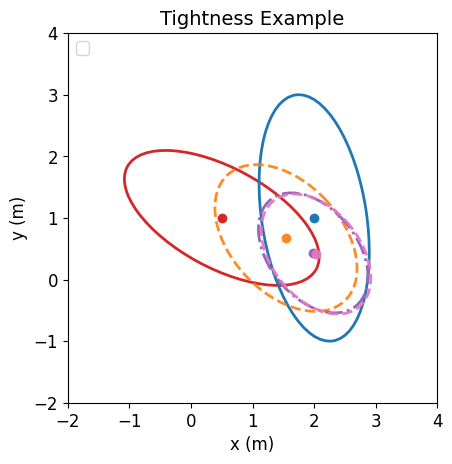

In [1]:
import collaborative_bearing_estimation as cbe
import numpy as np

# %matplotlib notebook
%matplotlib Qt5
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import datetime

## setting up the scenario


In [2]:

seed = np.random.randint(0,200)
print (seed)


#seed = 112 is not great for CCE vs CI possibly due to no implementation of rejecting inconsistent stuff
# seed= 67 # is a good case 
# seed= 62 # great for CCE but CI performs worse than KF possibly due to no rejection of inconsistent stuff
# seed = 197 # not great for CCE vs CI and almost matching Kalman
seed = 168 # this is a good case for CCE
# seed = 197 # also a very good case for CCE
# seed = 1 # also a good case
# good seeds 198, 106, 170, 

# np.random.seed (seed)

#initialize figure
###### these are the original ones
# x_range_plot = np.array([[-25],[60]])
# y_range_plot = np.array([[-70],[20]])

# this is me playing with it
x_range_plot = np.array([[-25],[40]])
y_range_plot = np.array([[-40],[25]])







# agent 1 and 2 list of positions with initial position added (same starting position for both)
x1 = np.array([[-15],[0]])
x2 = np.array([[8],[15]])

# target
x = np.array([[10],[-12]])



s1 = .3 # forward speed
a1 = np.deg2rad(0) #steering angle
xh1 = np.array([[2],[-1]])

e1 = 6**2
P1 = e1 * np.eye(2)
P1_inv = 1/e1 *np.eye(2)

min_est_r1 = 2 # min est range
max_est_r1 = 65 # max est range
est_ang_e1 = np.deg2rad(14) # est angle error std 

s2 = .3
a2 = np.deg2rad(-90)
xh2 = xh1 #np.array([[10],[-6]])

e2 =  e1
P2 = e2 * np.eye(2)
P2_inv = 1/e2 *np.eye(2)

min_est_r2 = 2 # min est range
max_est_r2 = 65 # max est range
est_ang_e2 = np.deg2rad(9) # est angle error std 

dt = 1
T = 1000 # simulation time

F_m = 1 # Frequency of measurements max =1 
F_c = 1 # Frequency of fusion max =1 

#create two agents that estimate the target
a_l_NC = []
a_l_C = []

agent1 = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "CI")

a1_NC = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, None)
a1_CCE = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "CCE")
a1_CI = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "CI")
a1_Kalman = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "Kalman")
a1_ICI = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "ICI")
a1_EI = cbe.Observer(1, x1, s1, a1, min_est_r1 , max_est_r1, est_ang_e1, xh1, P1, P1_inv, "EI")

a_l_NC.append(a1_NC)
a_l_C.append(a1_CCE)
a_l_C.append(a1_CI)
a_l_C.append(a1_Kalman)
a_l_C.append(a1_ICI)
a_l_C.append(a1_EI)

agent2 = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "CCE") 
a2_NC = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, None)
a2_CCE = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "CCE")
a2_CI = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "CI")
a2_Kalman = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "Kalman")
a2_ICI = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "ICI")
a2_EI = cbe.Observer(2, x2, s2, a2, min_est_r2, max_est_r2, est_ang_e2, xh2, P2, P2_inv, "EI")

a_l_NC.append(a2_NC)
a_l_C.append(a2_CCE)
a_l_C.append(a2_CI)
a_l_C.append(a2_Kalman)
a_l_C.append(a2_ICI)
a_l_C.append(a2_EI)





59


## simulation run

In [3]:
e_1 = np.random.normal(np.deg2rad(0), a_l_NC[0].th_e, size= int(T/dt)) # agent 1's entire measurement error
e_2 = np.random.normal(0, a_l_NC[1].th_e, size= int(T/dt)) 

# fig = plt.figure()
# ax = fig.add_subplot(111, aspect='equal')
# ax.set_xlim(x_range_plot[0,0], x_range_plot[1,0])
# ax.set_ylim(y_range_plot[0,0], y_range_plot[1,0])
# plt.title("Measurement Ellipses")

# ax.scatter(x[0,0], x[1,0], s = 100, marker="*", alpha=.5, c = "c", label= "Target") 
# ax.scatter(x1[0,0], x1[1,0], s = 100, marker="o", alpha=.5, c = "r", label= "Agent_1") 
# ax.scatter(x2[0,0], x2[1,0], s = 100, marker="o", alpha=.5, c = "b", label= "Agent_2") 
# for t in range (4):
    
#     cm, Pm, Pm_inv, f = a1_NC.sense(x, e_1[t])
#     a1_NC.plot_meas(cm, Pm, ax)
    
#     cm, Pm, Pm_inv, f = a2_NC.sense(x, e_2[t])
#     a2_NC.plot_meas(cm, Pm, ax)
    
# ax.legend()

# fig = plt.figure()
# ax = fig.add_subplot(111, aspect='equal')
# ax.set_xlim(x_range_plot[0,0], x_range_plot[1,0])
# ax.set_ylim(y_range_plot[0,0], y_range_plot[1,0])
# plt.title("initial setup")
# ax.scatter(x[0,0], x[1,0], s = 200, marker="*", alpha=1, c = "g", label= "Target") 
# for a in a_l_NC:
    
#     a.plot_pos(ax)
    
#     if a.ID ==1:
            
#             cm, Pm, Pm_inv, f = a.sense(x, e_1[0])
            
#     else: 
#             cm, Pm, Pm_inv, f = a.sense(x, e_2[0])
        
        
#     a.plot_meas(cm, Pm, ax)    

In [4]:
##### IMPORTANT CODE BLOCK BELOW #####
fig = plt.figure()
ax2 = fig.add_subplot(111, aspect='equal')
# ax2.set_xlim(x_range_plot[0,0], x_range_plot[1,0])
# ax2.set_ylim(y_range_plot[0,0], y_range_plot[1,0])
ax2.set_xlim(-25, 65)
ax2.set_ylim(-80,25)
plt.title("Scenario Configuration", fontsize=14)
plt.xlabel("x (m)", fontsize=12)
plt.ylabel("y (m)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
##### IMPORTANT CODE BLOCK ABOVE #####
##### PUT ALL THE PLOT CODE BACK IN WHEN YOU TAKE THE NUMBER OF STEPS DOWN

for a in a_l_C + a_l_NC :
    a.est_err(x) # capture the first estimation error
    a.nees(x)
    
### IMPORTANT BELOW ###
for a in a_l_NC:
    a.plot_pos(ax2, True)
### IMPORTANT ABOVE ###    
    
for t in range (int(T/dt)):
    
    print ("simulation time = ", t)
    # for a in a_l_NC:
    #         a.plot_pos(ax)
    
    if t % (1/F_m) ==0:        
        for a in a_l_NC + a_l_C:


            if a.ID ==1:

                cm, Pm, Pm_inv, f = a.sense(x, e_1[t])
                # ax2.scatter(cm[0,0], cm[1,0], marker="o", alpha=.025, c = "tab:red",)
                # a.plot_meas(cm, Pm, ax2)
                
            else: 
                cm, Pm, Pm_inv, f = a.sense(x, e_2[t])
                # ax2.scatter(cm[0,0], cm[1,0], marker="o", alpha=.025, c = "tab:blue")
                # a.plot_meas(cm, Pm, ax2)


            a.estimate(cm, Pm, Pm_inv, f)
            
        
    
    for a in a_l_C + a_l_NC : # after everyone has sensed then we can allow information exchange and move before the next round
        
        if t % (1/F_c) ==0:
            for m in [k for k in a_l_C if k.ID != a.ID and k.fuse_method == a.fuse_method ]: #only looking in collaborative agents with matching method
            
            
                print ("fusing agent {0}{1} with agent{2}{3}".format(a.ID,a.fuse_method, m.ID, m.fuse_method))
            
                a.fuse (m)
                # if a.fuse_method == "EI":
                #     a.plot_est(ax2, 'step')
        
#         a.move(dt)
        a.est_err(x)
        a.noiseFloor(t)
        # a.nees(x)
        if t >= 15:
            a.avgnoiseFloor(t)
        # if a.fuse_method != "EI":
        if a.fuse_method != "Kalman":
            a.nees(x)
            a.anees(t)
            if t >= 10:
                a.anees_moving_frame(t)
        # a.nees(x)
        # a.anees(t)

#         a.propagate(t) # deflates the confidence in prior initially less and eventually more before estimation
        
        
        
        # plt.pause(.8)
        # plt.show()
        
        
# for a in a_l_C + a_l_NC:
    
#     a.plot_est(ax)
#### IMPORTANT STUFF UNDER THIS LINE #####

ax2.scatter(x[0,0], x[1,0], s = 200, marker="*", alpha=0.8, c = "gold", label= "Target")      

 
agent2.plot_est(ax2, "Initial Estimated Sets")
# agent2.plot_est(ax2, "Agent 2 - Initial Estimate")


    
ax2.legend(fontsize=12)  
plt.show()

simulation time =  0
fusing agent 1CCE with agent2CCE
fusing agent 1CI with agent2CI
fusing agent 1Kalman with agent2Kalman
fusing agent 1ICI with agent2ICI
fusing agent 1EI with agent2EI
fusing agent 2CCE with agent1CCE
fusing agent 2CI with agent1CI
fusing agent 2Kalman with agent1Kalman
fusing agent 2ICI with agent1ICI
fusing agent 2EI with agent1EI
simulation time =  1
fusing agent 1CCE with agent2CCE
fusing agent 1CI with agent2CI
fusing agent 1Kalman with agent2Kalman
fusing agent 1ICI with agent2ICI
fusing agent 1EI with agent2EI
fusing agent 2CCE with agent1CCE
fusing agent 2CI with agent1CI
fusing agent 2Kalman with agent1Kalman
fusing agent 2ICI with agent1ICI
fusing agent 2EI with agent1EI
simulation time =  2
fusing agent 1CCE with agent2CCE
fusing agent 1CI with agent2CI
fusing agent 1Kalman with agent2Kalman
fusing agent 1ICI with agent2ICI
fusing agent 1EI with agent2EI
fusing agent 2CCE with agent1CCE
fusing agent 2CI with agent1CI
fusing agent 2Kalman with agent1Kalman

In [5]:

plt.rcParams['text.usetex'] = True

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
# plt.title ( "Estimation Error", fontsize=14)
# plt.xlabel("Time (s)", fontsize=14)
# plt.ylabel ("Euclidean Error", fontsize=14)
plt.title ( r'\textbf{Estimation Error}', fontsize=25)
plt.xlabel(r'\textbf{Simulation Steps}', fontsize=25)
plt.ylabel (r'$\Vert \hat{x}_k - p\Vert$ (m)', fontsize=25)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
plt.title ( r'\textbf{Estimation Covariance}', fontsize=25)
plt.xlabel(r'\textbf{Simulation Steps}', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.ylabel(r'$\det (\hat{P}_k)$', fontsize=25)

# plt.title ( "Estimation Covariance", fontsize=12)
# plt.xlabel("Time (s)", fontsize=12)
# plt.ylabel("det P_hat", fontsize=12)

fig8 = plt.figure()
ax8 = fig8.add_subplot(111)
plt.title ( r'\textbf{Noise floor reach}', fontsize=25)
plt.xlabel(r'\textbf{Simulation Steps}', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
plt.title ( r'\textbf{Average change of position estimate over last 10 steps}', fontsize=25)
plt.xlabel(r'\textbf{Simulation Steps}', fontsize=25)
plt.ylabel (r'\textbf{Avg. change (m)}', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
plt.title ( r'\textbf{Average Normalised Estimation Error Squared Moving Average}', fontsize=25)
plt.xlabel(r'\textbf{Simulation Steps}', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
plt.title ( r'\textbf{Average Normalised Estimation Error Squared}', fontsize=25)
plt.xlabel(r'\textbf{Simulation Steps}', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
plt.title ( r'\textbf{Normalised Estimation Error Squared}', fontsize=25)
plt.xlabel(r'\textbf{Simulation Steps}', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


           
for a in a_l_C + a_l_NC:
    if a.fuse_method == "Kalman":
        # continue
        color = 'g'
        # color ='k'
    if a.fuse_method == "CCE":
        color = 'b'
        # color ='k'
    if a.fuse_method == "CI":
        color = "r"
        # color ='k'
    if a.fuse_method == "ICI":
        color = "c"
        # color ='k'
    if a.fuse_method == "EI":
        color = "m"   
    if a.fuse_method == None:
        color ='k'
        
    if a.ID ==1:
        ls = "-"
        ms = 'x'
    else:
        ls = "--"
        ms = 'x'
    # log_err_l = np.log(a.err_l)

    ax2.plot(a.err_l, color=color, ls=ls, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
    # ax2.plot(log_err_l, color=color, ls=ls, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
    ax3.plot(a.conf_l, color=color, ls=ls, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
    ax4.plot(a.nees_l, color=color, ls=ls, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
    ax5.plot(a.anees_l, color=color, ls=ls, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
    ax6.plot(a.anees_l_moving, color=color, ls=ls, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
    ax7.plot(a.avnoiseFloor_l, color=color, ls=ls, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
    ax8.plot(a.FloorReach, color=color, marker=ms, label="Agent_{0}, Method_{1}".format(a.ID, a.fuse_method))
    ax5.legend(fontsize=18,loc='upper left')
    ax6.legend(fontsize=18,loc='upper left')
    ax7.legend(fontsize=18,loc='upper right')
    
ax2.legend(fontsize=18,loc='upper right')
ax3.legend(fontsize=18,loc='upper right')
ax4.legend(fontsize=18,loc='upper left')


plt.show()


In [6]:
print (np.rad2deg(e_1[0]), np.rad2deg(e_2[0]))

-5.65912931758673 1.2104404227460608
